In [1]:
# Core analysis packages
import numpy as np
import os, sys
import pandas as pd
from scipy import stats
from scipy.stats import fisher_exact
from scipy.special import comb
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import anova
import bff
import pingouin as pg
import researchpy
from sklearn.preprocessing import StandardScaler
from pingouin import mediation_analysis, read_dataset

# Plotting packages
import matplotlib.pyplot as plt
plt.rcdefaults()
import seaborn as sns 
from adjustText import adjust_text # For nonoverlapping text labels on plots
sns.set(style="ticks", color_codes=True)
sns.set_style("white")
sns.set_style({'xtick.bottom': True, 'ytick.left': True})
colorref = ["gray", "royalblue", "crimson", "goldenrod", "mediumorchid", "seagreen"]

# iPython magic commands
%matplotlib notebook
%load_ext autoreload
%autoreload 2
%autosave 30

SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIG_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIG_SIZE)  # fontsize of the figure title
cust_palette = sns.color_palette("Paired")[6:10]
cust_palette = [cust_palette[i] for i in [1,0,3,2]]

def median_split(S):
    return S > S.median()

/opt/anaconda3/envs/research/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.3, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/anaconda3/envs/research/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


Autosaving every 30 seconds


In [2]:
# Load file (from same directory as the notebook)
df = pd.read_csv(("text.csv"))
df.head(2)

,ID,age,edu,gender,Condition,ide,WC,Affect,emotion
0,201,32.0,Graduate degree,0,Low,78,47,12.77,8.51
1,202,50.0,Some college,1,Low,46,36,16.67,16.67


<IPython.core.display.Javascript object>


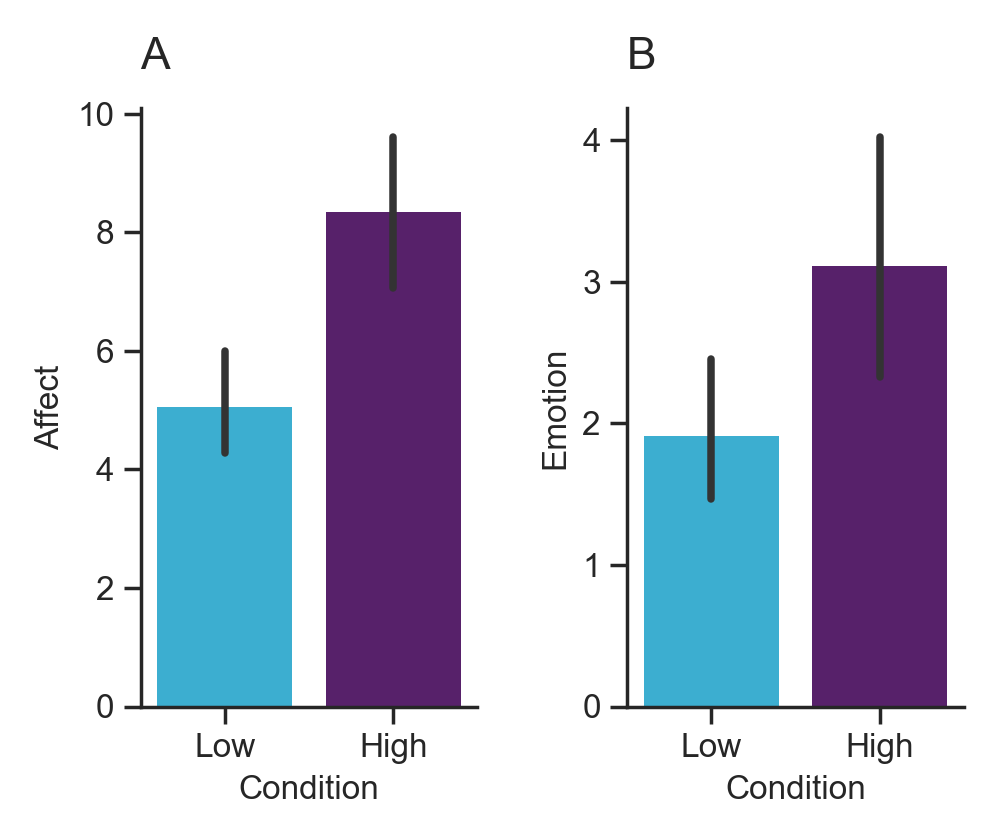

In [4]:
colors = ["#23BCE9", "#5D1576"]
fig, ax = plt.subplots(1,2, figsize=(5,4.2))
sns.barplot(x="Condition", y="Affect", data=df, \
            palette=colors, edgecolor="", errcolor=".2", \
            ax=ax[0]) 
sns.barplot(x="Condition", y="emotion", data=df, \
            palette=colors, edgecolor="", errcolor=".2", \
            ax=ax[1]) 

ax[0].set_ylabel("Affect")
ax[1].set_ylabel("Emotion")
bff.panellabel(ax[0], "A")
bff.panellabel(ax[1], "B")

sns.despine()
plt.tight_layout()
plt.savefig('Fig5.png', dpi=300, format="png")

In [49]:
md = smf.ols("Affect ~ Condition + WC", df)
mdf = md.fit()
print(mdf.summary())

                            OLS Regression Results                            
Dep. Variable:                 Affect   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     27.91
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           2.19e-12
Time:                        20:04:00   Log-Likelihood:                -2619.0
No. Observations:                 697   AIC:                             5244.
Df Residuals:                     694   BIC:                             5258.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           11.4156      0.743  

In [50]:
md = smf.ols("emotion ~ Condition + WC", df)
mdf = md.fit()
print(mdf.summary())

                            OLS Regression Results                            
Dep. Variable:                emotion   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     12.83
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           3.39e-06
Time:                        20:04:01   Log-Likelihood:                -2289.1
No. Observations:                 697   AIC:                             4584.
Df Residuals:                     694   BIC:                             4598.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.4794      0.463  